In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Suicides in India 2001-2012.csv")

In [3]:
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [4]:
df.shape

(237519, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
State        237519 non-null object
Year         237519 non-null int64
Type_code    237519 non-null object
Type         237519 non-null object
Gender       237519 non-null object
Age_group    237519 non-null object
Total        237519 non-null int64
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


Hence, there are no null values

In [6]:
df.describe() # Only for numeric fields

,Year,Total
count,237519.000000,237519.000000
mean,2006.500448,55.034477
std,3.452240,792.749038
min,2001.000000,0.000000
25%,2004.000000,0.000000
50%,2007.000000,0.000000
75%,2010.000000,6.000000
max,2012.000000,63343.000000


In [7]:
df.columns

Index(['State', 'Year', 'Type_code', 'Type', 'Gender', 'Age_group', 'Total'], dtype='object')

In [29]:
#Segregate the column 'Type_code'-

eduDf = df[df['Type_code']=='Education_Status']  #Educational status
meansDf = df[df['Type_code']=='Means_adopted']  #Means adopted for suicide
causesDf = df[df['Type_code']=='Causes']  # Causes of suicides
profDf = df[df['Type_code']=='Professional_Profile'] # Professional profile of people committing suicide
socialDf = df[df['Type_code']=='Social_Status']  # Social status of people committing suicide

In [9]:
eduDf.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
260,A & N Islands,2001,Education_Status,Diploma,Female,0-100+,0
261,A & N Islands,2001,Education_Status,No Education,Female,0-100+,4
262,A & N Islands,2001,Education_Status,Post Graduate and Above,Female,0-100+,0
263,A & N Islands,2001,Education_Status,Middle,Female,0-100+,33
264,A & N Islands,2001,Education_Status,Graduate,Female,0-100+,0


In [10]:
causesDf.head()

,State,Year,Type_code,Type,Gender,Age_group,Total


In [11]:
meansDf.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
276,A & N Islands,2001,Means_adopted,By Consuming Insecticides,Female,0-14,0
277,A & N Islands,2001,Means_adopted,By Hanging,Female,0-14,2
278,A & N Islands,2001,Means_adopted,By Jumping from (Other sites),Female,0-14,0
279,A & N Islands,2001,Means_adopted,By touching electric wires,Female,0-14,0
280,A & N Islands,2001,Means_adopted,By Machine,Female,0-14,0


In [12]:
profDf.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
436,A & N Islands,2001,Professional_Profile,Retired Person,Female,0-14,0
437,A & N Islands,2001,Professional_Profile,Unemployed,Female,0-14,0
438,A & N Islands,2001,Professional_Profile,Public Sector Undertaking,Female,0-14,0
439,A & N Islands,2001,Professional_Profile,Service (Private),Female,0-14,0
440,A & N Islands,2001,Professional_Profile,House Wife,Female,0-14,0


In [13]:
socialDf.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
552,A & N Islands,2001,Social_Status,Married,Female,0-100+,38
553,A & N Islands,2001,Social_Status,Seperated,Female,0-100+,0
554,A & N Islands,2001,Social_Status,Widowed/Widower,Female,0-100+,0
555,A & N Islands,2001,Social_Status,Divorcee,Female,0-100+,0
556,A & N Islands,2001,Social_Status,Never Married,Female,0-100+,12


In [14]:
#dimensions

df.shape, eduDf.shape, causesDf.shape, meansDf.shape, profDf.shape, socialDf.shape

((237519, 7), (7296, 7), (0, 7), (67200, 7), (49263, 7), (4560, 7))

#### Distribution of number of suicides on the basis of education¶

In [15]:
eduDf = eduDf[["Type", "Gender", "Total"]]

In [16]:
edu_sorted = eduDf.groupby(["Type", "Gender"], as_index = False).sum().sort_values('Total', ascending = False)

In [17]:
edu_sorted.head()

,Type,Gender,Total
15,Primary,Male,679461
9,Middle,Male,675624
11,No Education,Male,566445
7,Matriculate/Secondary,Male,523878
14,Primary,Female,409020


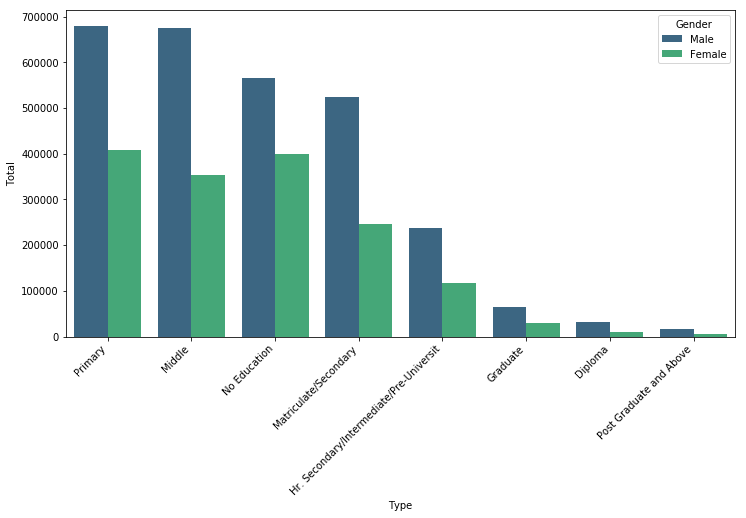

In [18]:
plt.figure(figsize= (12,6))
sns.barplot(x='Type',y='Total',hue='Gender',data=edu_sorted,palette='viridis')
plt.xticks(rotation=45,ha='right') #rotation of x label
plt.show()

Number of suicides appear to be concentrated towards Lower education level. Most of the people who have committed suicides have education level below Matriculate/Secondary. In each category the number of male committing suicide is higher than female.

#### Distribution of number of suicides on the basis of social status

In [19]:
socialDf.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
552,A & N Islands,2001,Social_Status,Married,Female,0-100+,38
553,A & N Islands,2001,Social_Status,Seperated,Female,0-100+,0
554,A & N Islands,2001,Social_Status,Widowed/Widower,Female,0-100+,0
555,A & N Islands,2001,Social_Status,Divorcee,Female,0-100+,0
556,A & N Islands,2001,Social_Status,Never Married,Female,0-100+,12


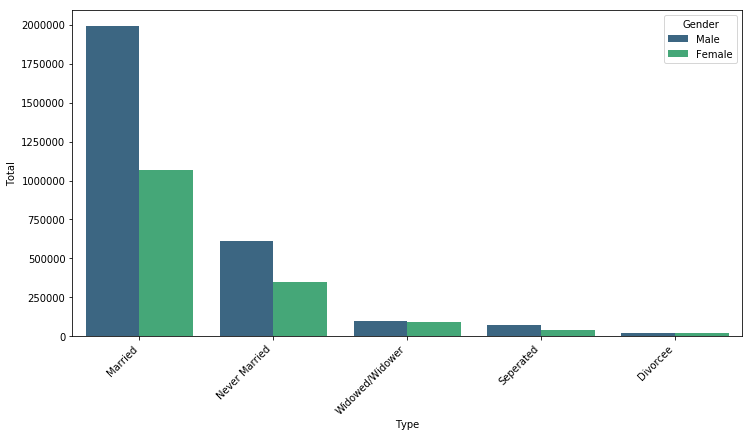

In [20]:
socialDf = socialDf[["Type", "Gender", "Total"]]
social_sorted = socialDf.groupby(["Type", "Gender"], as_index = False).sum().sort_values('Total', ascending = False)
plt.figure(figsize= (12,6))
sns.barplot(x='Type',y='Total',hue='Gender',data=social_sorted,palette='viridis')
plt.xticks(rotation=45,ha='right') #rotation of x label
plt.show()

Married people are more prone to commit suicide.

#### Distribution of number of suicides on the basis of causes

In [30]:
causesDf.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


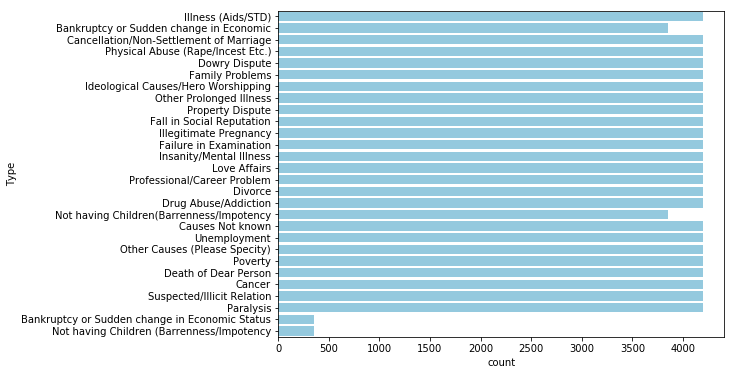

In [31]:
plt.figure(figsize=(8,6))
sns.countplot(y = "Type", data = causesDf, color = "skyblue")
plt.show() 

Here we can see the following observations:
    
1. Bankruptcy or Sudden change in Economics is same as Bankruptcy or Sudden chnage in Economic Status.
2. Other Causes(Please Specify) can be grouped with Causes Not known.
3. Not having Children(Barrenness/Impotency is repeated twice.

C:\Users\RD\Anaconda3.1\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


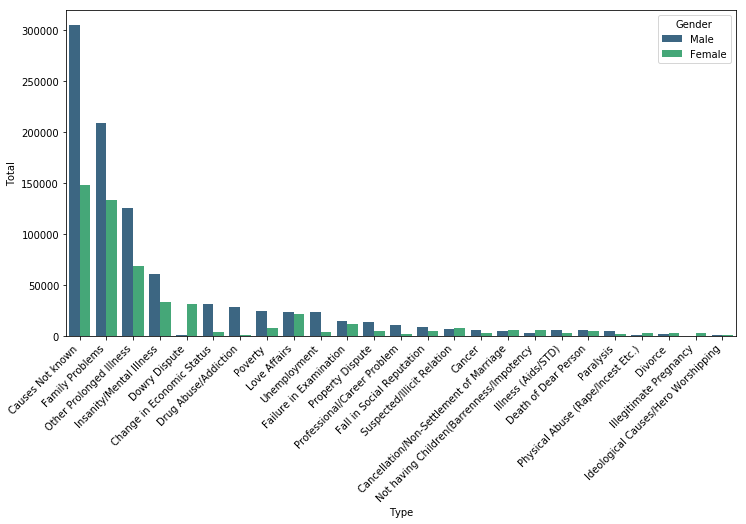

In [32]:
causesDf.loc[causesDf['Type']=='Bankruptcy or Sudden change in Economic','Type'] = 'Change in Economic Status'
causesDf.loc[causesDf['Type']=='Bankruptcy or Sudden change in Economic Status','Type'] = 'Change in Economic Status'
causesDf.loc[causesDf['Type']=='Other Causes (Please Specity)','Type'] = 'Causes Not known'
causesDf.loc[causesDf['Type']=='Not having Children (Barrenness/Impotency','Type'] = 'Not having Children(Barrenness/Impotency'
plt.figure(figsize=(12,6))
causesDf = causesDf[['Type','Gender','Total']]
causesSort = causesDf.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
sns.barplot(x='Type',y='Total',data=causesSort,hue='Gender',palette='viridis')
plt.xticks(rotation=45,ha='right')
plt.show()

The reason for Highest number of suicides is not known but the second highest is Family Problems.

#### Distribution of number of suicides on the professional status

In [33]:
profDf.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
436,A & N Islands,2001,Professional_Profile,Retired Person,Female,0-14,0
437,A & N Islands,2001,Professional_Profile,Unemployed,Female,0-14,0
438,A & N Islands,2001,Professional_Profile,Public Sector Undertaking,Female,0-14,0
439,A & N Islands,2001,Professional_Profile,Service (Private),Female,0-14,0
440,A & N Islands,2001,Professional_Profile,House Wife,Female,0-14,0


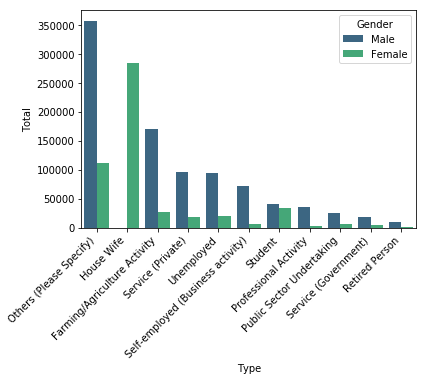

In [34]:
profDf = profDf[['Type','Gender','Total']]
profSort = profDf.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
sns.barplot(x='Type',y='Total',data=profSort,hue='Gender',palette='viridis')
plt.xticks(rotation=45,ha='right')
plt.show()

According to the data, most of the females who have committed suicides are house wives. The percentage of female suicides in all other categories is much lower than the percentage of male suicides. 

It is disheartening to see that farmers who feed the rest of the country are the ones who are more committing suicides than any other profession.  Followed by farmers, it's the unemployed and private sector employees who are most effected.

#### Distribution of number of suicides on the causes state and Age wise

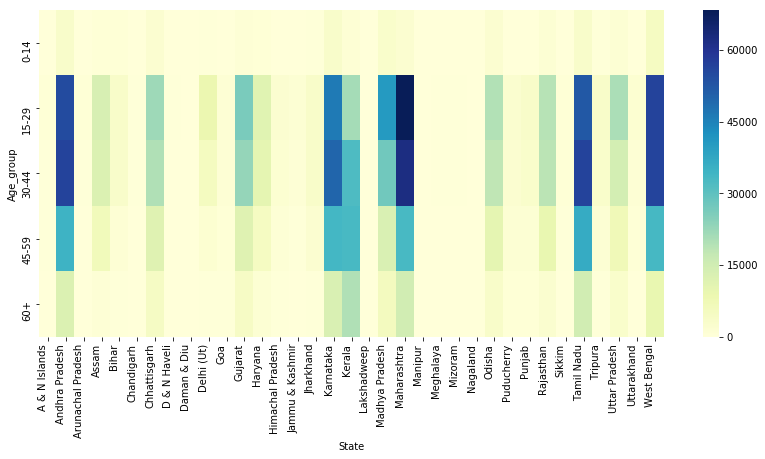

In [39]:
causes = df[df['Type_code']=='Causes']
causesGrp = causes.groupby(['State','Age_group'],as_index=False).sum()
causesGrpPvt = causesGrp.pivot(index='Age_group',columns='State',values='Total')
plt.figure(figsize=(14,6))
plt.xticks(rotation=45,ha='right')
sns.heatmap(causesGrpPvt,cmap='YlGnBu')
plt.show()

Age groups 30-44 and 15-29 are more prone to suicide.

#### Distribution of number of suicides on the Education state and Age wise

In [44]:
eduDf.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
260,A & N Islands,2001,Education_Status,Diploma,Female,0-100+,0
261,A & N Islands,2001,Education_Status,No Education,Female,0-100+,4
262,A & N Islands,2001,Education_Status,Post Graduate and Above,Female,0-100+,0
263,A & N Islands,2001,Education_Status,Middle,Female,0-100+,33
264,A & N Islands,2001,Education_Status,Graduate,Female,0-100+,0


In [53]:
edu = df[df['Type_code']=='Education_Status']
st = edu.groupby(['State','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
st = st[(st['State']!='Total (States)') & (st['State']!='Total (All India)') & (st['State']!='Total (Uts)')]
st.head()

,State,Gender,Year,Total
41,Maharashtra,Male,192624,121754
3,Andhra Pradesh,Male,192624,108424
61,Tamil Nadu,Male,192624,102489
75,West Bengal,Male,192624,100411
33,Karnataka,Male,192624,98391


In [49]:
# values for areas are taken from wikipedia
statesArea = {'Maharashtra':307713,'West Bengal':88752,'Tamil Nadu':130058,'Andhra Pradesh':275045,'Karnataka':191791,'Kerala':38863,'Madhya Pradesh':308350,'Gujarat':196024,'Chhattisgarh':135191,'Odisha':155707,'Rajasthan':342239,'Uttar Pradesh':243290,'Assam':78438,'Haryana':44212,'Delhi (Ut)':1484,'Jharkhand':79714,'Punjab':50362,'Bihar':94163,'Tripura':10486,'Puducherry':562,'Himachal Pradesh':55673,'Uttarakhand':53483,'Goa':3702,'Jammu & Kashmir':222236,'Sikkim':7096,'A & N Islands':8249,'Arunachal Pradesh':83743,'Meghalaya':22429,'Chandigarh':114,'Mizoram':21081,'D & N Haveli':491,'Manipur':22327,'Nagaland':16579,'Daman & Diu':112,'Lakshadweep':32}

In [51]:
statesArea

{'Maharashtra': 307713,
 'West Bengal': 88752,
 'Tamil Nadu': 130058,
 'Andhra Pradesh': 275045,
 'Karnataka': 191791,
 'Kerala': 38863,
 'Madhya Pradesh': 308350,
 'Gujarat': 196024,
 'Chhattisgarh': 135191,
 'Odisha': 155707,
 'Rajasthan': 342239,
 'Uttar Pradesh': 243290,
 'Assam': 78438,
 'Haryana': 44212,
 'Delhi (Ut)': 1484,
 'Jharkhand': 79714,
 'Punjab': 50362,
 'Bihar': 94163,
 'Tripura': 10486,
 'Puducherry': 562,
 'Himachal Pradesh': 55673,
 'Uttarakhand': 53483,
 'Goa': 3702,
 'Jammu & Kashmir': 222236,
 'Sikkim': 7096,
 'A & N Islands': 8249,
 'Arunachal Pradesh': 83743,
 'Meghalaya': 22429,
 'Chandigarh': 114,
 'Mizoram': 21081,
 'D & N Haveli': 491,
 'Manipur': 22327,
 'Nagaland': 16579,
 'Daman & Diu': 112,
 'Lakshadweep': 32}

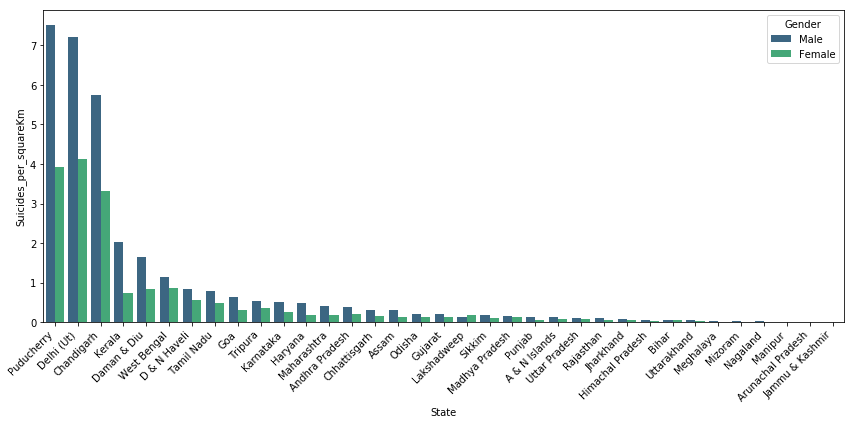

In [55]:
for state in statesArea.keys():
    st.loc[st['State']==state,'Area'] = statesArea[state]
st['Suicides_per_squareKm'] = st['Total']/st['Area']
sortedStates = st.sort_values('Suicides_per_squareKm',ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x='State',y='Suicides_per_squareKm',data=sortedStates,hue='Gender',palette='viridis')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

In [57]:
indiaOverall = df[(df["Type_code"] == "Education_Status") & (df["State"] == "Total (All India)")]

In [58]:
indiaOverall.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
209476,Total (All India),2001,Education_Status,Hr. Secondary/Intermediate/Pre-Universit,Female,0-100+,2391
209477,Total (All India),2001,Education_Status,Diploma,Female,0-100+,294
209478,Total (All India),2001,Education_Status,Matriculate/Secondary,Female,0-100+,5486
209479,Total (All India),2001,Education_Status,No Education,Female,0-100+,12817
209480,Total (All India),2001,Education_Status,Post Graduate and Above,Female,0-100+,192


In [60]:
overall = indiaOverall.groupby(["Year"],as_index = False).sum()
overall.head()

,Year,Total
0,2001,108506
1,2002,110417
2,2003,110851
3,2004,113697
4,2005,113914


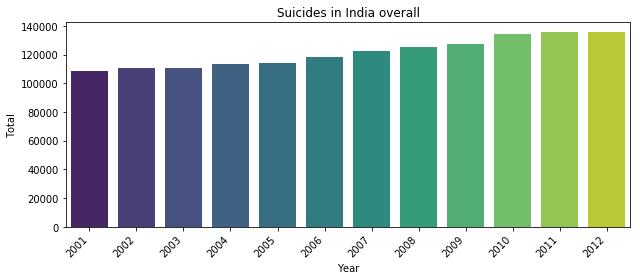

In [61]:
plt.figure(figsize=(9,4))
plt.xticks(rotation=45,ha='right')
sns.barplot(x='Year',y='Total',data=overall,palette='viridis').set_title('Suicides in India overall')
plt.tight_layout()

Suicides are increasing year by year of overall India.

In [62]:
Suicides_in_2012 = int(overall[overall["Year"] == 2012]["Total"])
Suicides_in_2001 = int(overall[overall["Year"] == 2001]["Total"])
(Suicides_in_2012 - Suicides_in_2001)*100 / Suicides_in_2012

19.889253940713942

Increase in Suicide rate from 2001 to 2012 is 19.89%